## License Information
---

This file is distributed as part of `hvsrpy`, a Python package for horizontal-to-vertical spectral ratio processing.

    Copyright (C) 2019-2020 Joseph P. Vantassel (jvantassel@utexas.edu)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.
    
## About _hvsrpy_ and this notebook
---

`hvsrpy` is a Python package for performing horizontal-to-vertical spectral ratio
(H/V) processing. `hvsrpy` was developed by Joseph P. Vantassel with
contributions from Dana M. Brannon under the supervision of Professor Brady R.
Cox at The University of Texas at Austin.  The automated frequency-domain
window-rejection algorithm and log-normal statistics implemented in `hvsrpy` were
developed by Tianjian Cheng under the supervision of Professor Brady R. Cox at
The University of Texas at Austin and are detailed in Cox et al. (2020), citation
below.

If you use _hvsrpy_ in your research, we ask you please cite the following:

>Cox, B. R., Cheng, T., Vantassel, J. P., and Manuel, L. (2020). “A Statistical
Representation and Frequency-Domain Window-Rejection Algorithm for
Single-Station HVSR Measurements.” _Geophysical Journal International._
In review.

>Joseph Vantassel. (2020). jpvantassel/hvsrpy: latest (Concept). Zenodo.
[http://doi.org/10.5281/zenodo.3666956](http://doi.org/10.5281/zenodo.3666956)

_Note: For software, version specific citations should be preferred to
general concept citations, such as that listed above. To generate a version
specific citation for `hvsrpy`, please use the citation tool for that specific
version on the `hvsrpy` [archive](http://doi.org/10.5281/zenodo.3666956)._


## Getting Started
---
1. Install _hvsrpy_ and its dependencies, with `pip install hvsrpy`. If you are not familiar with `pip`, a useful tutorial can be found [here](https://github.com/jpvantassel/python3-course/blob/master/1_Installing_Packages/pip.md). __(~3 minutes)__
2. Try analyzing the four provided examples. The names of these files have been written and commented out in the section _Time Domain Settings_ for your convenience. __(~15 minutes)__
3. Try one of your own _miniseed_ files and confirm that, when the same settings are used, the result from _hvsrpy_ exactly matches that of Geopsy. If you get an error related to the _miniseed_ file this likely means it does not conform to the _SEED_ standard (refer to the [hvsrpy documentation](https://hvsrpy.readthedocs.io/en/latest/?badge=latest) for details). __(~15 minutes)__

Happy Processing!

In [1]:
import hvsrpy
import numpy as np
import matplotlib.pyplot as plt
import time

## Time Domain Settings
---

In [23]:
# Input file name (may be a relative or full path).
# file_name = "UT.STN11.A2_C50.miniseed"
# file_name = "UT.STN11.A2_C150.miniseed"
# file_name = "UT.STN12.A2_C50.miniseed"
file_name = "UT.STN12.A2_C150.miniseed"

# Window length in seconds. In general low frequency peaks require longer window lengths.
# See the SESAME guidelines for specific window length recommendations.
windowlength = 60

# Boolean to control whether Butterworth filter is applied. 
# Geopsy does not apply a bandpass filter.
filter_bool = False        
# Low-cut frequency for bandpass filter.
flow = 0.1                   
# High-cut frequency for bandpass filter.
fhigh = 30                   
# Filter order.
forder = 5

# Width of cosine taper {0. - 1.}. Geopsy default of 0.05 is equal to 0.1 -> 0.1 is recommended
width = 0.1

## Frequency Domain Settings
---

In [24]:
# Konno and Ohmachi smoothing constant. 40 is recommended.
bandwidth = 40

# Minimum frequency after resampling
minf = 0.2    
# Maximum frequency after resampling
maxf = 20
# Number of frequencies after resampling
nf = 128
# Type of resampling {'log', 'linear'}
res_type = 'log'

## H/V Settings
---

In [25]:
# Method for combining horizontal components {"squared-average", "geometric-mean"}.
# Geopsy's default is "squared-average" -> "geometric-mean" is recommended.
method = 'geometric-mean'

# Boolean to control whether frequency domain rejection proposed by Cox et al. (in review) is applied.
# Geopsy does not offer this functionality.
rejection_bool = True
# Number of standard deviations to consider during rejection. Smaller values will reject more windows -> 2 is recommended.
n = 2
# Maximum number of iterations to perform for rejection -> 50 is recommended.
n_iteration = 50

# Distribution of f0 {"log-normal", "normal"}. Geopsy default "normal" -> "log-normal" is recommended.
distribution_f0 = "log-normal"
# Distribution of mean curve {"log-normal", "normal"}. Geopsy default "log-normal" -> "log-normal" is recommended.
distribution_mc = "log-normal"

## Perform Calculation
---

Elapsed Time: 2.24 seconds

******************** Statistics Before Rejection *******************
                                 | Log-Normal |     Log-Normal     |
|              Name              |   Median   | Standard Deviation |
|--------------------------------+------------+--------------------|
| Fundemental Site Frequency, f0 |   0.70 Hz  |        0.24        |
|   Fundemental Site Period, T0  |   1.42 s   |       -0.24        |

Window length :  60s
No. of windows : 60
Number of iterations to convergence: 8 of 50 allowed.
No. of rejected windows : 21

******************** Statistics After Rejection ********************
                                 | Log-Normal |     Log-Normal     |
|              Name              |   Median   | Standard Deviation |
|--------------------------------+------------+--------------------|
| Fundemental Site Frequency, f0 |   0.79 Hz  |        0.05        |
|   Fundemental Site Period, T0  |   1.25 s   |       -0.05        |



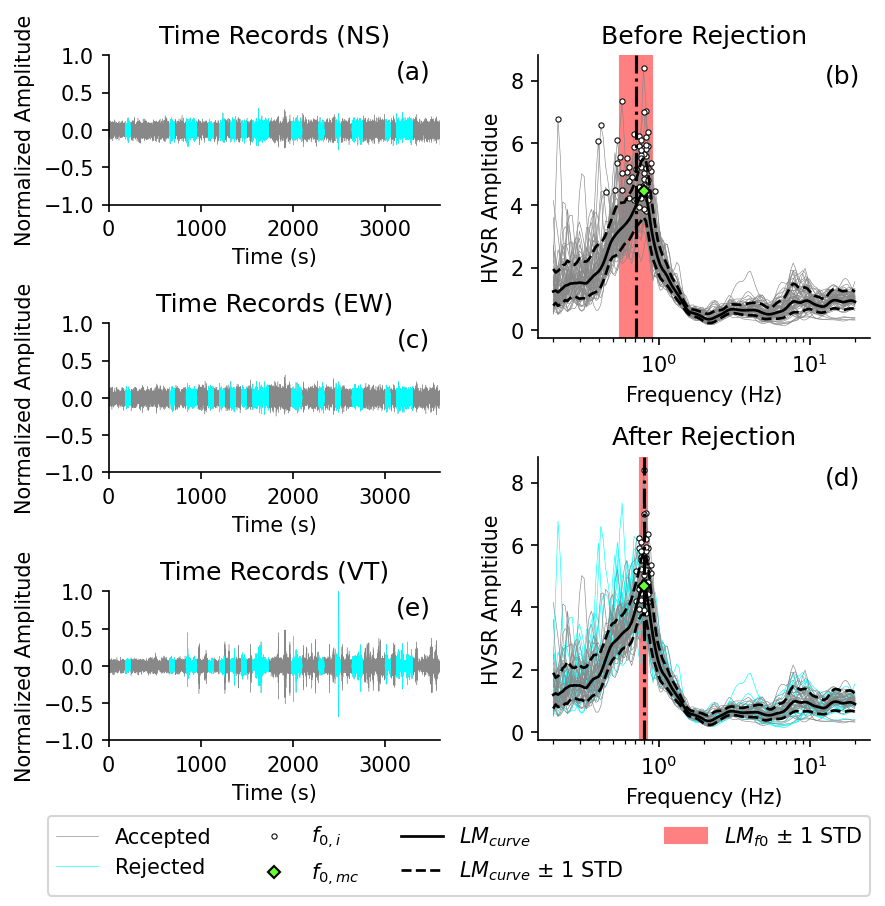

In [26]:
fig = plt.figure(figsize=(6,6), dpi=150)
gs = fig.add_gridspec(nrows=6,ncols=6)

ax0 = fig.add_subplot(gs[0:2, 0:3])
ax1 = fig.add_subplot(gs[2:4, 0:3])
ax2 = fig.add_subplot(gs[4:6, 0:3])

if rejection_bool:
    ax3 = fig.add_subplot(gs[0:3, 3:6])
    ax4 = fig.add_subplot(gs[3:6, 3:6])
else:
    ax3 = fig.add_subplot(gs[0:3, 3:6])
    ax4 = False

start = time.time()
sensor = hvsrpy.Sensor3c.from_mseed(file_name)
bp_filter = {"flag":filter_bool, "flow":flow, "fhigh":fhigh, "order":forder}
resampling = {"minf":minf, "maxf":maxf, "nf":nf, "res_type":res_type}
hv = sensor.hv(windowlength, bp_filter, width, bandwidth, resampling, method)
end = time.time()
print(f"Elapsed Time: {str(end-start)[0:4]} seconds")

individual_width = 0.3
median_width = 1.3
for ax, title in zip([ax3, ax4], ["Before Rejection", "After Rejection"]):
    # Rejected Windows
    if title=="After Rejection":
        if hv.rejected_window_indices.size>0:
            label = "Rejected"
            for amp in hv.amp[hv.rejected_window_indices]:
                ax.plot(hv.frq, amp, color='#00ffff', linewidth=individual_width, zorder=2, label=label)
                label=None
            
    # Accepted Windows
    label="Accepted"
    for amp in hv.amp[hv.valid_window_indices]:
        ax.plot(hv.frq, amp, color='#888888', linewidth=individual_width,
                label = label if title=="Before Rejection" else "")
        label=None
    
    # Window Peaks
    ax.plot(hv.peak_frq, hv.peak_amp, linestyle="", zorder=2,
            marker='o', markersize=2.5, markerfacecolor="#ffffff", markeredgewidth=0.5, markeredgecolor='k',
            label="" if title=="Before Rejection" and rejection_bool else r"$f_{0,i}$")
    
    # Peak Mean Curve
    ax.plot(hv.mc_peak_frq(distribution_mc), hv.mc_peak_amp(distribution_mc), linestyle="", zorder=4,
            marker='D', markersize=4, markerfacecolor='#66ff33', markeredgewidth=1, markeredgecolor='k', 
            label = "" if title=="Before Rejection" and rejection_bool else r"$f_{0,mc}$")
    
    # Mean Curve
    label = r"$LM_{curve}$" if distribution_mc=="log-normal" else "Mean Curve"   
    ax.plot(hv.frq, hv.mean_curve(distribution_mc), color='k', linewidth=median_width,
            label="" if title=="Before Rejection" and rejection_bool else label)
    
    # Mean +/- Curve
    label = r"$LM_{curve}$"+" ± 1 STD" if distribution_mc=="log-normal" else "Mean ± 1 STD"
    ax.plot(hv.frq, hv.nstd_curve(-1, distribution_mc),
            color='k', linestyle='--', linewidth=median_width, zorder=3,
            label = "" if title=="Before Rejection" and rejection_bool else label)
    ax.plot(hv.frq, hv.nstd_curve(+1, distribution_mc),
            color='k', linestyle='--', linewidth=median_width, zorder=3)

    label = r"$LM_{f0}$"+" ± 1 STD" if distribution_f0=="log-normal" else "Mean f0 ± 1 STD"
    ymin, ymax = ax.get_ylim()
    ax.plot([hv.mean_f0_frq(distribution_f0)]*2, [ymin, ymax], linestyle="-.", color="#000000")
    ax.fill([hv.nstd_f0_frq(-1, distribution_f0)]*2 + [hv.nstd_f0_frq(+1, distribution_f0)]*2, [ymin, ymax, ymax, ymin], 
            color = "#ff8080",
            label="" if title=="Before Rejection" and rejection_bool else label)
    
    ax.set_ylim((ymin, ymax))
    ax.set_xscale('log')
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("HVSR Ampltidue")
    n_spaces = 19
    if rejection_bool:
        if title=="Before Rejection":
            print()
            print(f"*{'*'*n_spaces} Statistics Before Rejection {'*'*n_spaces}")
            hv.print_stats(distribution_f0)
            print()
            c_iter = hv.reject_windows(n, max_iterations=n_iteration, 
                                       distribution_f0=distribution_f0, distribution_mc=distribution_mc)
            print(f"Window length :  {str(windowlength)}s")
            print(f"No. of windows : {sensor.ns.n_windows}")
            print(f"Number of iterations to convergence: {c_iter} of {n_iteration} allowed.")
        elif title=="After Rejection":
            fig.legend(ncol=4, loc='lower center', bbox_to_anchor=(0.51, 0), columnspacing=2)
            print(f"No. of rejected windows : {len(hv.rejected_window_indices)}")
    
            print()
            print(f"*{'*'*n_spaces} Statistics After Rejection {'*'*n_spaces}*")
            hv.print_stats(distribution_f0)
            print()
    else:
        n_spaces += 9
        print()
        print(f"Window length :  {str(windowlength)}s")
        print(f"No. of windows : {sensor.ns.n_windows}")
        print()
        print(f"*{'*'*n_spaces} Statistics{'*'*n_spaces}")
        hv.print_stats(distribution_f0)
        print()
        fig.legend(loc="upper center", bbox_to_anchor=(0.77, 0.4))
        break
    ax.set_title(title)

norm_factor = sensor.normalization_factor
for ax, timerecord, name in zip([ax0,ax1,ax2], [sensor.ns, sensor.ew, sensor.vt], ["NS", "EW", "VT"]):
    ctime = timerecord.time
    amp = timerecord.amp/norm_factor
    ax.plot(ctime.T, amp.T, linewidth=0.2, color='#888888')
    ax.set_title(f"Time Records ({name})")
    ax.set_yticks([-1, -0.5, 0, 0.5, 1])
    ax.set_xlim(0, windowlength*timerecord.n_windows)
    ax.set_ylim(-1, 1)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Normalized Amplitude')
    for window_index in hv.rejected_window_indices:
        ax.plot(ctime[window_index], amp[window_index], linewidth=0.2, color="cyan")
        
if rejection_bool:
    axs = [ax0, ax3, ax1, ax4, ax2]
else:
    axs = [ax0, ax3, ax1, ax2]
    
for ax, letter in zip(axs, list("abcde")):    
    ax.text(0.97, 0.97, f"({letter})", ha="right", va="top", transform=ax.transAxes, fontsize=12)
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)


fig.tight_layout(h_pad=1, w_pad=2, rect=(0,0.08,1,1))
plt.show()

## Save Figure to File
---

In [27]:
figure_name_out = "example_hvsr_figure.png"

fig.savefig(figure_name_out, dpi=300, bbox_inches='tight')
plt.close()
print("Figure saved successfully!")

Figure saved successfully!


## Save Results to Text File
---

In [28]:
file_name_out = "example_output_hvsrpy.hv"

hv.to_file(file_name_out, distribution_f0, distribution_mc)
print("Results saved successfully!")

Results saved successfully!


## Save Results to Geopsy-Style Text File
---

In [29]:
file_name_out = "example_output_geopsy.hv"

hv.to_file_like_geopsy(file_name_out, distribution_f0, distribution_mc)
print("Results saved successfully!")

Results saved successfully!
